In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.DataFrame(pd.read_csv(city_data_to_load))
ride_data = pd.DataFrame(pd.read_csv(ride_data_to_load))

# Combine the data into a single dataset
data = pd.merge(ride_data,city_data,on='city',how='left')

# Display the data table for preview
data.head()
# city_data.head()
# ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
urb = data[data['type']=='Urban']
urb_dc = city_data[city_data['type'] == 'Urban']
urb_city = urb.groupby('city')

sub = data[data['type']=='Suburban']
sub_dc = city_data[city_data['type']=="Suburban"]
sub_city = sub.groupby('city')

rur = data[data['type']=='Rural']
rur_dc = city_data[city_data['type']=="Rural"]
rur_city = rur.groupby('city')


## Bubble Plot of Ride Sharing Data

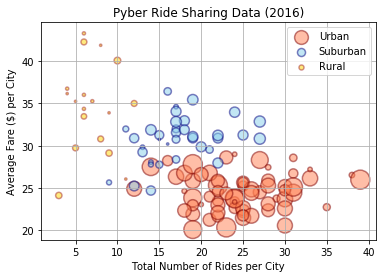

In [30]:
# Obtain the x and y coordinates for each of the three city types
urb_tot_num_rides = urb_city['date'].count()
urb_tot_fare = urb_city['fare'].sum()
urb_avg_fare = urb_tot_fare/urb_tot_num_rides
urb_tot_num_drivers = urb['driver_count']

sub_tot_num_rides = sub_city['date'].count()
sub_tot_fare = sub_city['fare'].sum()
sub_avg_fare =  sub_tot_fare/sub_tot_num_rides
sub_tot_num_drivers = sub['driver_count']

rur_tot_num_rides = rur_city['date'].count()
rur_tot_fare = rur_city['fare'].sum()
rur_avg_fare =  rur_tot_fare/rur_tot_num_rides
rur_tot_num_drivers = rur['driver_count']

# Build the scatter plots for each city types
urban = plt.scatter(x=urb_tot_num_rides,y=urb_avg_fare,c='coral',s=urb_tot_num_drivers*5,label='Urban',alpha=.5,edgecolors='maroon',linewidths=1.5)
suburban = plt.scatter(x=sub_tot_num_rides,y=sub_avg_fare,c='skyblue',s=sub_tot_num_drivers*5,label='Suburban',alpha=.5,edgecolors='navy',linewidths=1.5)
rural = plt.scatter(x=rur_tot_num_rides,y=rur_avg_fare,c='gold',s=rur_tot_num_drivers*5,label='Rural',alpha=.5,edgecolors='brown',linewidths=1.5)

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($) per City')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# Create a legend
plt.legend(handles=[urban, suburban, rural], loc="best",markerscale=1)

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("images/PyberData_2016.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

In [5]:
labels = ['Urban','Suburban', 'Rural']
colors = ['coral','skyblue','gold']
explode = (.1,0,0)

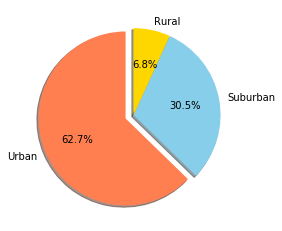

In [6]:
# Calculate Type Percents
tot_fare = [urb_tot_fare.sum(),sub_tot_fare.sum(),rur_tot_fare.sum()]

# Build Pie Chart
plt.pie(tot_fare, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90, autopct="%1.1f%%")

# Save Figure
plt.savefig("images/PyberData_2016_TotFaresPie.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

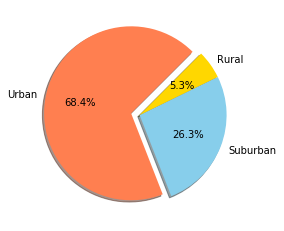

In [15]:
# Calculate Ride Percents
tot_ride = [urb_tot_num_rides.sum(), sub_tot_num_rides.sum(), rur_tot_num_rides.sum()]

# Build Pie Chart
plt.pie(tot_ride, labels=labels, colors=colors, explode=explode, shadow=True, startangle=45, autopct="%1.1f%%")

# Save Figure
plt.savefig("images/PyberData_2016_TotRidesPie.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

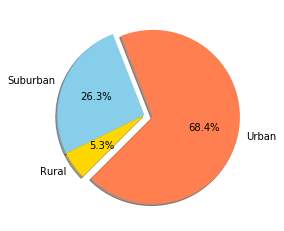

In [31]:
# Calculate Driver Percents
tot_drivers = [urb_tot_num_drivers.sum(),sub_tot_num_drivers.sum(),rur_tot_num_drivers.sum()]

# Build Pie Charts
plt.pie(tot_ride, labels=labels, colors=colors, explode=explode, shadow=True, startangle=225, autopct="%1.1f%%")

# Save Figure
plt.savefig("images/PyberData_2016_TotDriversPie.png")

In [ ]:
# Show Figure
plt.show()